# Problems Notebook
Author: Myles Henehan
// Module: Applied Statistics


## Introduction (Placeholder)

### Libraries

In [20]:
# Mathematical functions from the standard library (https://docs.python.org/3/library/math.html)
import math
# Permutations and combinations (https://docs.python.org/3/library/itertools.html)
import itertools
# Random selections (https://docs.python.org/3/library/random.html)
import random
# Numerical structures and operations (https://numpy.org/doc/stable/reference/index.html#reference)
import numpy as np
# Plotting (https://matplotlib.org/stable/contents.html)
import matplotlib.pyplot as plt
# For statistical functions such as ttest_ind (https://docs.scipy.org/doc/scipy/reference/stats.html)
import scipy
# Data manipulation (https://pandas.pydata.org/docs/)
import pandas as pd


## Problem 1: Extending the Lady Tasting Tea

In our first problem, we examine Fisher’s classic “Lady Tasting Tea” experiment from his 1935 book *The Design of Experiments*. The story behind the experiment is that a woman (often informally identified as Dr. Muriel Bristol) claimed she could detect whether milk was poured into a cup before or after the tea. To test this, Fisher prepared 8 cups—4 with milk added first and 4 with tea added first—randomized their order, and asked her to identify each cup’s preparation method. The null hypothesis is that she has no genuine ability to tell the difference, while the alternative hypothesis is that she can. Although the original experiment used 8 cups, we will extend the setup to 12 cups to explore how increasing the sample size affects the analysis.

### Original Experiment:

Before extending the experiment, it’s useful to revisit the structure and purpose of Fisher’s original design. By understanding the logic behind the classic setup—its hypotheses, randomization, and reasoning—we establish a clear baseline for comparison. This recap will help highlight how changes in sample size or configuration influence the statistical properties of the test when we later adapt the experiment to 12 cups.

Number of combinations: 70
Milk-first cups (random selection): [0, 1, 2, 7]
Overlap counts: (array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))


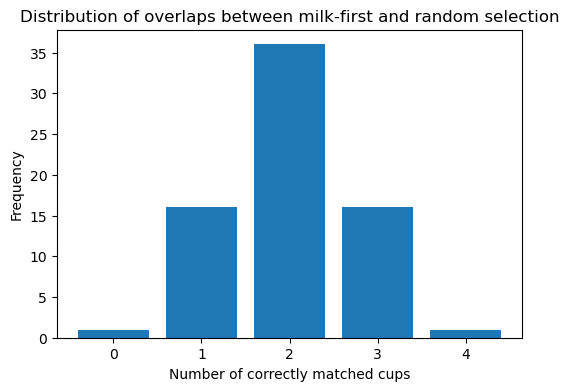

The probability of choosing 0 cups correctly is 0.0143
The probability of choosing 1 cups correctly is 0.2286
The probability of choosing 2 cups correctly is 0.5143
The probability of choosing 3 cups correctly is 0.2286
The probability of choosing 4 cups correctly is 0.0143


In [21]:
# Set the total number of cups in the original experiment
no_cups = 8
# Set the number of cups where milk is added first
no_cups_milk_first = 4
# Set the number of cups where tea is added first
no_cups_tea_first = 4


# Calculate the number of combinations of choosing 4 cups out of 8 (Fisher's 70)
no_possibilities = math.comb(no_cups, no_cups_milk_first)
# Print the total number of possible assignments
print("Number of combinations:", no_possibilities)


# Create a list of cup labels from 0 to 7
labels = list(range(no_cups))
# Randomly select 4 unique cups that will represent the "milk-first" assignment
labels_milk = random.sample(labels, no_cups_milk_first)
# Sort the selected labels so the output is easier to read
labels_milk.sort()
# Print the randomly selected milk-first cups
print("Milk-first cups (random selection):", labels_milk)


# Generate all possible combinations of choosing 4 cups out of 8
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Create an empty list to store how many cups overlap with our random selection
no_overlaps = []

# Loop over every possible combination
for comb in combs:
    # Compute how many cups in this combination are also in the randomly selected set
    overlap = len(set(comb).intersection(labels_milk))
    # Store the number of overlaps
    no_overlaps.append(overlap)


# Count how often each overlap value occurs
counts = np.unique(no_overlaps, return_counts=True)
# Print the overlap counts
print("Overlap counts:", counts)


# Create a figure for the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
# Plot the distribution of overlaps
ax.bar(counts[0], counts[1])
# Label the x-axis
ax.set_xlabel("Number of correctly matched cups")
# Label the y-axis
ax.set_ylabel("Frequency")
# Add title to the plot
ax.set_title("Distribution of overlaps between milk-first and random selection")
# Display the plot
plt.show()


# Compute the theoretical probabilities using Fisher’s exact combinatorial formula
probabilities = [(math.comb(4, k) * math.comb(4, 4-k)) / no_possibilities for k in range(5)]

# Print the probability of getting k cups correct for k = 0 to 4
for k, p in enumerate(probabilities):
    print(f"The probability of choosing {k} cups correctly is {p:.4f}")




### Adapting the Experiment

To extend the experiment, we’ll use the same approach as before, but apply it to a larger set of cups.

As per before, we start by setting the number of samples for our experiment.

In [22]:
# Number of cups of tea in total.
no_cups_v2 = 12
# Number of cups of tea with milk in first.
no_cups_milk_first_v2 = 4
# Number of cups of tea with tea in first.
no_cups_tea_first_v2 = 8

Once we've defined the number of samples, we can then work out the number of possible combinations.

In [23]:
# Again, we use math.comb to figure out the number of possiblities, this picking 4 cups from 12.
no_possibilities_v2 = math.comb(no_cups_v2, no_cups_milk_first_v2)
# Output this number
print("Number of combinations:", no_possibilities_v2)

Number of combinations: 495


As we can see above, there are 495 different ways of picking 4 cups from a sample size of 12.

In [24]:
# # Create a list of cup labels from 0 to 11 (the length of no_cups_v2)
labels_v2 = list(range(no_cups_v2))
# Randomly select 4 unique cups that will represent the "milk-first" assignment
labels_milk_v2 = random.sample(labels_v2, no_cups_milk_first_v2)
# Sort the selected labels so the output is easier to read
labels_milk_v2.sort()
# Print the randomly selected milk-first cups
print("Milk-first cups (random selection):", labels_milk_v2)

Milk-first cups (random selection): [5, 7, 9, 10]


In [25]:
# Generate all possible combinations of choosing 4 cups out of 12
combs_v2 = list(itertools.combinations(labels_v2, no_cups_milk_first_v2))
# Create an empty list to store how many cups overlap with our random selection
no_overlaps_v2 = []

# Loop over every possible combination
for comb in combs_v2:
    # Compute how many cups in this combination are also in the randomly selected set
    overlap_v2 = len(set(comb).intersection(labels_milk_v2))
    # Store the number of overlaps
    no_overlaps_v2.append(overlap_v2)

In [26]:
# Count overlap frequencies
counts_v2 = np.unique(no_overlaps_v2, return_counts=True)
# Print the overlap counts
print("Overlap counts:", counts_v2)

Overlap counts: (array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))


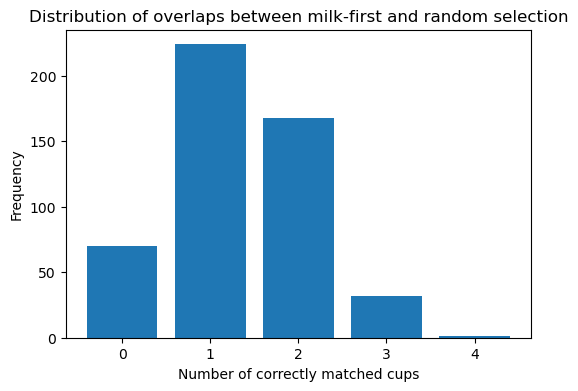

In [27]:
# Plot distribution
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts_v2[0], counts_v2[1])
ax.set_xlabel("Number of correctly matched cups")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of overlaps between milk-first and random selection")
plt.show()

In [28]:
# Converted to probabilities (divide by 70):
probabilities_v2 = [(math.comb(4, k) * math.comb(8, 4-k)) / no_possibilities_v2 for k in range(5)]

# For each probability, print how likely it is to get k cups correct.
for k, p in enumerate(probabilities_v2):
    print(f"The probability of choosing {k} cups correctly is {p:.4f}")

The probability of choosing 0 cups correctly is 0.1414
The probability of choosing 1 cups correctly is 0.4525
The probability of choosing 2 cups correctly is 0.3394
The probability of choosing 3 cups correctly is 0.0646
The probability of choosing 4 cups correctly is 0.0020


### What does this probability mean?

As shown above, increasing the total number of cups makes it less likely that the lady will correctly identify all four, assuming she is selecting at random. Let’s explore this behaviour in more detail.

Intuitively, the more options she has to choose from, the lower the probability of getting every cup right by chance. In our example, this probability falls from about 1.43% to just 0.2% as the number of possible choices increases. Under the null hypothesis — that the lady is simply guessing — each possible arrangement is equally likely. When the number of possible arrangements grows, the chance of selecting the correct one purely by luck becomes smaller.

In both scenarios, the resulting p-value is very low, which offers evidence against the null hypothesis and suggests that the lady may indeed possess the ability to distinguish between the cups if she does guess correctly (Khan Academy, https://www.youtube.com/watch?v=KS6KEWaoOOE).

### Statistical Significance

In hypothesis testing, statistical significance acts as a gatekeeper, which helps to decide whether to accept or reject the null hypothesis (Statsig, https://www.statsig.com/perspectives/what-is-statistical-significance).Typically, a p-value of less than 0.05 is considered statistically significant, so this is what researchers would normally consider the p-value threshold, denoted by α (Statsig, https://www.statsig.com/perspectives/alpha-significance-level-statistics). In our experiment, both scenarios have a p-value of less than 0.05, so we would consider them both statistically significant under the common threshold, but the question we need to ask ourselves is whether it is worthwhile adjusting the threshold.

To answer this, we would need to consider what we are trying to achieve. Lowering the threshold won't change our conclusion, because in either case, we would reject the null hypothesis. Nonetheless, it does have an effect on our confidence level (Analytics Toolkit, https://blog.analytics-toolkit.com/2018/confidence-intervals-p-values-percent-change-relative-difference/). 

One argument for reducing the significance threshold is the extraordinary nature of the claim. To quote Sagan (1995), "Extraordinary claims require extraordinary evidence". This is a quote commonly cited in statistics to support a stricter significance threshold for more unusual claims. Choosing a lower p-value threshold can be justified in this experiment, since the claim being tested — that the lady can distinguish the cups by taste — is somewhat unlikely and therefore requires stronger evidence.

However, it is also important to consider how costly it would be to draw the wrong conclusion. In fields such as medical research, a strict threshold is used because the consequences of being wrong can be serious (Statsig, https://www.statsig.com/perspectives/significance-stricter-threshold); it is often preferable to avoid false positives, even at the risk of missing true effects. By contrast, in a low-stakes setting like tea tasting, the outcome carries little real-world consequence. Therefore, while a lower threshold could be justified on the basis of the claim’s unusual nature, it is not strictly necessary given the context.



## Problem 2: Normal Distribution

Brief: Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### Generation of Samples

In [29]:

# Generate 100,000 samples, each of size 10 (eg. 10 sets of 100000 rows/samples), using standard normal distribution.
samples = np.random.normal(size=(100000, 10))

# Check the top row of data for reference.
print(samples[0])

[-0.99093481  1.38247703  1.34097711 -1.22480287 -0.03062566 -0.84497829
 -2.08875362  1.48962916  0.03763862 -0.21829501]


As we can see, these 10 values converge around 0 as the mean, since we didn't choose the Loc parameter (https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). They also use the default standard distribution of 1.

### Plotting of Samples
Now let's plot this to have a visual reference. Since we have a set of continuous values, it would make most sense to show this in a histogram.

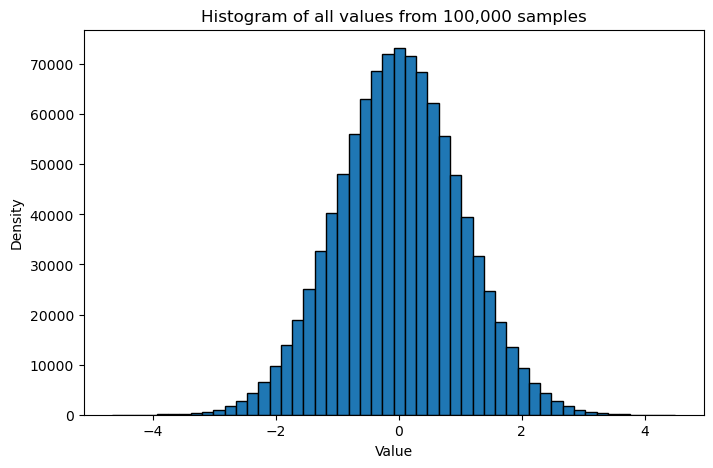

In [30]:
# Flatten the 2D array to 1D so we can plot all values together
all_values = samples.flatten()

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 5))
# Plot a histogram of all values
ax.hist(all_values, bins=50, edgecolor='black')
# Set the x-axis label
ax.set_xlabel("Value")
# Set the y-axis label
ax.set_ylabel("Density")
# Set the plot title
ax.set_title("Histogram of all values from 100,000 samples")
# Display the plot
plt.show()


### Plotting of the Population Distribution vs Sample Distribution
In this particular problem, we are asked to compute and plot the standard deviation of each sample in two different ways:

1. Population standard deviation (using ddof = 0)
2. Sample standard deviation (using ddof = 1)

To understand the difference between the population and the sample, Jaisingh (2006, p.5) describes the population as all subjects that we are interested in studying, whereas the sample is a subset of that population.

These two standard deviations differ in how they estimate variability. The population SD assumes the data represents the entire population and divides by n. The sample SD, used when the data is only a subset of the population, divides by n – 1, applying Bessel’s correction to adjust for bias in small samples. (https://www.statisticshowto.com/bessels-correction/e).

To start, we compute the standard deviation across each row so that we obtain one SD value per sample. The NumPy .std() function allows us to specify the ddof parameter, which determines whether we calculate the sample standard deviation or the population standard deviation (https://numpy.org/devdocs/reference/generated/numpy.std.html).

In [31]:
# Sample standard deviation per row (ddof = 1)
sd_sample = np.std(samples, axis=1, ddof=1)
# Population standard deviation per row (ddof = 0)
sd_population = np.std(samples, axis=1, ddof=0)


We can then use these SD values to plot our histogram.

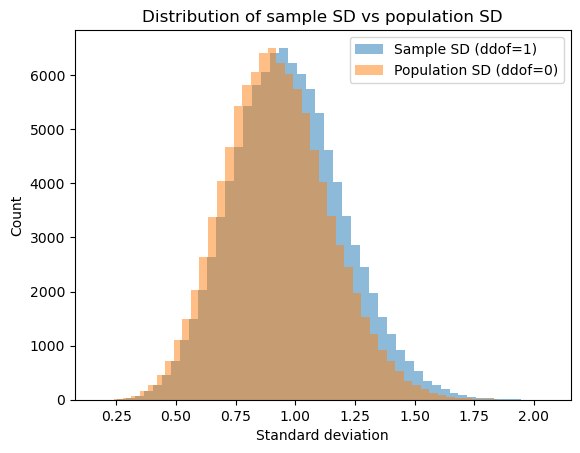

In [32]:
# Plot the sample SD histogram, using the alpha=0.5 parameter for transparency (https://www.geeksforgeeks.org/python/overlapping-histograms-with-matplotlib-in-python/)
plt.hist(sd_sample, bins=50, alpha=0.5, label='Sample SD (ddof=1)')
# Plot the population SD histogram, using the alpha=0.5 parameter for transparency
plt.hist(sd_population, bins=50, alpha=0.5, label='Population SD (ddof=0)')
# Add a legend
plt.legend()
# Label the x axis as Standard Deviation
plt.xlabel("Standard deviation")
# Label the y axis as the Count
plt.ylabel("Count")
# Give the plot a title
plt.title("Distribution of sample SD vs population SD")
# Show this plot
plt.show()

### Comparing the 2 Histograms
The most noticeable difference between the two histograms is that the distribution of the population standard deviation is shifted slightly to the left of the sample standard deviation. This arises because each estimator measures variability in a different way. The sample standard deviation, which divides by n − 1, tends to produce slightly larger values, as this adjustment corrects for the downward bias that occurs when calculating variability from a small sample (https://www.datacamp.com/tutorial/sample-standard-deviation). Consequently, its distribution is centred just above 1, the true standard deviation of the underlying normal distribution. In contrast, the population standard deviation uses a divisor of n, which narrows the variability (https://www.youtube.com/watch?v=cF5wiq9pq8Q).  Although the two distributions overlap substantially, their peaks differ, illustrating the clear distinction between the two estimators with a sample size of 10.


### Why Sample Size Matters
Sample size has a role to play in the difference between these 2 metrics because it directly affects the accuracy and variability of estimates. Smaller samples contain less information, so each observation has a greater influence, making estimates like the standard deviation more variable from one sample to another (Jaisingh, 2006, pp.50-55). Bessel’s correction (dividing by n − 1 instead of n) has a larger effect when the sample size is small, inflating the sample SD to correct bias (https://nickmaini.substack.com/p/standard-deviation-and-bessels-correction). As the sample size increases, estimates become more stable, the distribution of the sample standard deviation narrows, and the difference between the sample and population SDs naturally becomes more negligible.

### Distribution for higher values of N
Let's have a look now what would happen if we increased the sample size.

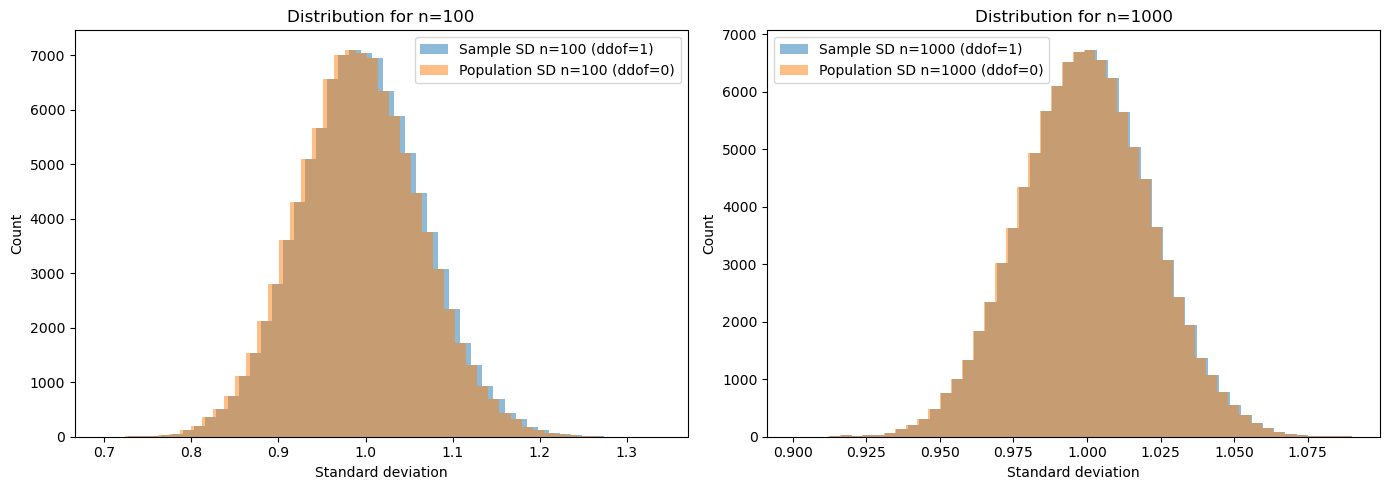

In [33]:
# Generate samples
sample_b = np.random.normal(size=(100000, 100))
sample_c = np.random.normal(size=(100000, 1000))

# Compute SDs
sd_b_sample = np.std(sample_b, axis=1, ddof=1)
sd_b_population = np.std(sample_b, axis=1, ddof=0)

sd_c_sample = np.std(sample_c, axis=1, ddof=1)
sd_c_population = np.std(sample_c, axis=1, ddof=0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for sample_b
axes[0].hist(sd_b_sample, bins=50, alpha=0.5, label=f'Sample SD n=100 (ddof=1)')
axes[0].hist(sd_b_population, bins=50, alpha=0.5, label=f'Population SD n=100 (ddof=0)')
axes[0].legend()
axes[0].set_xlabel("Standard deviation")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution for n=100")

# Plot for sample_c
axes[1].hist(sd_c_sample, bins=50, alpha=0.5, label=f'Sample SD n=1000 (ddof=1)')
axes[1].hist(sd_c_population, bins=50, alpha=0.5, label=f'Population SD n=1000 (ddof=0)')
axes[1].legend()
axes[1].set_xlabel("Standard deviation")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution for n=1000")

plt.tight_layout()
plt.show()



As per the plot above, as sample size increases, the distinction between sample and population standard deviations diminishes until it is barely noticable at n = 1000. As already discussed, in smaller samples, the sample standard deviation is more susceptible to random variation, which can cause noticeable deviations from the true population value. Larger samples, however, mitigate these fluctuations by providing a more representative snapshot of the population, leading to sample SD values that converge toward the population SD. This behaviour is consistent with statistical theory, which indicates that the variance of the sample variance decreases as sample size grows, thereby increasing the precision and reliability of the sample-based estimate. In practical terms, this illustrates the principle that larger datasets yield estimates that more accurately reflect underlying population parameters (https://statisticsbyjim.com/basics/sample-size/).

## Problem 3: t-Tests

Brief:
A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d =0,0.1,0.2,…,1.0, repeat the following simulation 1,000 times:

- Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
- Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
- Record the proportion of times the null hypothesis is not rejected.
- Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

### What is a T-Test?
Before starting this simulation, let's take a step back and look at what a t-test is and what its application is. A t-test is a statistical method used to determine whether there is a meaningful difference between the means of two groups. Also know as a t-statistic or t-distribution (https://www.qualtrics.com/en-gb/experience-management/research/t-test/), it helps us assess whether any observed difference in sample averages is likely due to real differences in their underlying populations, or whether it could simply have happened by chance (https://www.geeksforgeeks.org/data-science/t-test/).

Although the t-test focuses on comparing means, it also incorporates information about:

- Variance: how spread out the data is within each group. Larger variance means more uncertainty, which affects how confident we can be about differences.

- Sample size: smaller samples introduce more randomness and noise; the t-test adjusts for this.

- Random variation: the test uses the variability within each group to estimate how much of the difference in means might just be due to natural fluctuation (https://statisticsbyjim.com/hypothesis-testing/independent-samples-t-test/#google_vignette).

By combining these components, the t-test produces a t-statistic, which is then compared against a theoretical distribution (the t-distribution). This comparison yields a p-value, helping us decide whether the difference between the two samples is statistically significant (https://www.statsig.com/perspectives/interpret-t-statistic-hypothesis-testing).

### Defining our samples and running an independent T-Test.

In [34]:

from scipy.stats import ttest_ind
# Define d, a sequence of values starting at zero, stopping before 1.01, and incrementing by 0.1 (https://numpy.org/devdocs/reference/generated/numpy.arange.html)
d_values = np.arange(0, 1.01, 0.1)

# Store proportion of fails for each d
proportions = []

# to iterate through the d values
for value in d_values:
   # Count how many times we FAIL to reject H0 (i.e., p ≥ 0.05), initialising at 0
   fails = 0
   for n in range(1000):
      # Sample of size 100 from the standard normal distribution
      snd_sample = np.random.normal(loc=0, scale=1, size=100)

      # Second sample of size 100, SD=1, mean shifted by the current value of d
      d_sample = np.random.normal(loc=value, scale=1, size=100)
        
      # Run a two-sample t-test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
      stat, p_value = ttest_ind(snd_sample, d_sample)

      # Decision rule at alpha = 0.05 (https://www.jmp.com/en/statistics-knowledge-portal/t-test/one-sample-t-test)
      if p_value >=  0.05:
         fails = fails + 1
   proportions.append(fails / 1000)

# convert this list into a Pandas data frame to visualise how the proportion of fails changes as d changes (https://www.geeksforgeeks.org/python/create-a-pandas-dataframe-from-lists/)
results = pd.DataFrame({'d': d_values, 'Proportion of fails to reject H0': proportions})
print(results)

      d  Proportion of fails to reject H0
0   0.0                             0.953
1   0.1                             0.897
2   0.2                             0.711
3   0.3                             0.423
4   0.4                             0.183
5   0.5                             0.058
6   0.6                             0.014
7   0.7                             0.002
8   0.8                             0.000
9   0.9                             0.000
10  1.0                             0.000


### Plotting proportion of fails against d-values

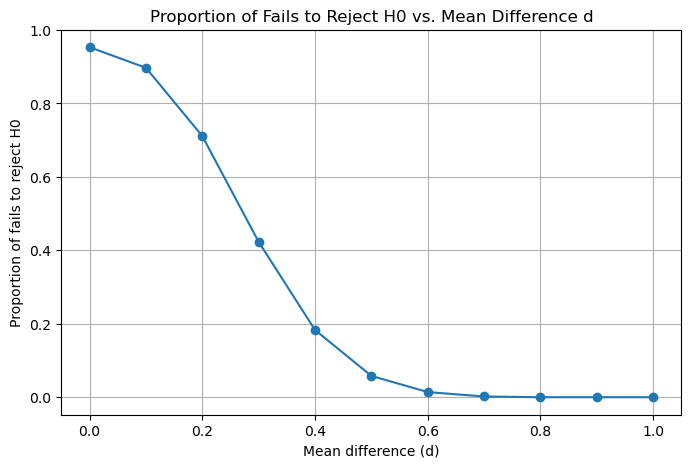

In [35]:
# create new figure with adjusted size
plt.figure(figsize=(8,5))
# plot a line graph with d_values on the x axis and proportions on the y axis, using o as the marker for each data point
plt.plot(d_values, proportions, marker='o')
# Adding a title
plt.title("Proportion of Fails to Reject H0 vs. Mean Difference d")
# Labelling the x axis
plt.xlabel("Mean difference (d)")
# Labelling the y axis
plt.ylabel("Proportion of fails to reject H0")
# adding a grid for better visualisation
plt.grid(True)
plt.show()

### Explanation of the data

The pattern in the results reflects how the t-test responds to increasing differences between group means. When the true mean difference is small, the sample means tend to be close together relative to the variability in the data. In this situation, the calculated t statistic is usually small, meaning there is not enough evidence to conclude that the observed difference is statistically significant. As a result, we fail to reject the null hypothesis (H₀) in most cases. This is consistent with what we expect under the null: small or negligible differences are likely to arise from random sampling variation (https://www.investopedia.com/terms/s/samplingerror.asp).

As the mean difference increases, the separation between the two groups becomes larger relative to the standard deviation. This leads to a larger t statistic and a smaller p-value (https://www.statsig.com/perspectives/interpret-pvalue-ttest-guide). Consequently, the probability of correctly rejecting H₀ increases. In our results, this trend is clearly visible: once the mean difference passes around 0.7, the test becomes sufficiently sensitive that H₀ is rejected in every trial. At that point, the effect size is large enough that random variation is no longer a plausible explanation for the observed differences (https://numiqo.com/tutorial/effect-size-independent-t-test).

Overall, the results illustrate the expected relationship between effect size and test performance: larger true differences produce higher statistical power and more consistent rejection of the null hypothesis (https://www.scribbr.com/statistics/statistical-power/).

## Problem 4: ANOVA

Brief: Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.
- Perform a one-way ANOVA to test whether all three means are equal.
- Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
- Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

### Generating Samples
I will start by generating the three independent samples:

In [36]:
# As per previous problems, I use NumPy's random.normal() function to create my 3 random samples from the normal distribution.
# For each sample I change the first parameter in the function (mean). The standard deviation and sample size are the same across the 3 samples.
sample1 = np.random.normal(0,1,30)
sample2 = np.random.normal(0.5,1,30)
sample3 = np.random.normal(1,1,30)

### Performing ANOVA
Let's start by performing ANOVA on our 3 generated samples

In [41]:
# import the stats module from scipy
from scipy import stats
# run a one-way ANOVA test
f_stat, p_val = stats.f_oneway(sample1, sample2, sample3)
# print the f-statistic
print("F-statistic:", f_stat)
# print the p-value
print("p-value:", p_val)

F-statistic: 6.878845541181922
p-value: 0.0016845561485325945


As we can see, our p-value is much lower than 0.05. This is to be expected, since the means of the samples are vastly different. Let's use Tukey's HSD post-hoc test to determine how each sample differs from one another.

In [42]:
# Add code for Tukey's HSD

### Performing Three individual 2-sample t-tests

In [44]:
test_1 = stats.ttest_ind(sample1, sample2) 
test_2 = stats.ttest_ind(sample1, sample3)
test_3 = stats.ttest_ind(sample2, sample3)

print("sample1 vs sample2:", test_1)
print("sample1 vs sample3:", test_2)
print("sample2 vs sample3:", test_3)

sample1 vs sample2: TtestResult(statistic=np.float64(-1.808806062995649), pvalue=np.float64(0.07566523515232376), df=np.float64(58.0))
sample1 vs sample3: TtestResult(statistic=np.float64(-3.5196486984730257), pvalue=np.float64(0.0008481633900946858), df=np.float64(58.0))
sample2 vs sample3: TtestResult(statistic=np.float64(-1.9894997516083512), pvalue=np.float64(0.0513685590974192), df=np.float64(58.0))


From running 3 individual t-tests, we can see that sample1 vs sample3 has an extremely low p-value. This is expected since their means differ so widely. What's interesting is that even though the difference in mean between sample1 and sample2 and the difference in mean between sample2 and sample3 is the same, the p-value is quite a bit higher for sample1 vs sample2.